### <center>Análise Preditiva: **Artista**</center>

In [117]:
#Bibliotecas
import spotipy
import os 
import dotenv
import requests
import pandas as pdj
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [118]:
#Path local com os arquivos .json
base_path = "SpotifyPacks/spotify Extended Streaming History"

In [119]:
#Transformação dos arquivos JSON em DataFrames
dfs = []

files  = os.listdir(base_path)
#Percorrendo arquivos
for file in files:
    if file.startswith("Streaming_History_Audio") and file.endswith(".json"):
        file_path = os.path.join(base_path, file)
        
        df_temp = pd.read_json(file_path)
        dfs.append(df_temp)

df = pd.concat(dfs, ignore_index=True)

In [120]:
display(df.count())
display(df.describe())
display(df.info())

ts                                   79091
platform                             79091
ms_played                            79091
conn_country                         79091
ip_addr                              79091
master_metadata_track_name           78686
master_metadata_album_artist_name    78686
master_metadata_album_album_name     78686
spotify_track_uri                    78686
episode_name                           404
episode_show_name                      404
spotify_episode_uri                    404
audiobook_title                          0
audiobook_uri                            0
audiobook_chapter_uri                    0
audiobook_chapter_title                  0
reason_start                         79091
reason_end                           79091
shuffle                              79091
skipped                              79091
offline                              79091
offline_timestamp                    70990
incognito_mode                       79091
dtype: int6

,ms_played,audiobook_title,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,offline_timestamp
count,7.909100e+04,0.0,0.0,0.0,0.0,7.099000e+04
mean,4.408411e+04,NaN,NaN,NaN,NaN,5.078522e+09
std,7.248168e+04,NaN,NaN,NaN,NaN,7.426253e+10
min,0.000000e+00,NaN,NaN,NaN,NaN,1.665789e+09
25%,1.223000e+03,NaN,NaN,NaN,NaN,1.730523e+09
50%,4.097000e+03,NaN,NaN,NaN,NaN,1.757096e+09
75%,6.044300e+04,NaN,NaN,NaN,NaN,1.765042e+09
max,1.432075e+06,NaN,NaN,NaN,NaN,1.665771e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79091 entries, 0 to 79090
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ts                                 79091 non-null  object 
 1   platform                           79091 non-null  object 
 2   ms_played                          79091 non-null  int64  
 3   conn_country                       79091 non-null  object 
 4   ip_addr                            79091 non-null  object 
 5   master_metadata_track_name         78686 non-null  object 
 6   master_metadata_album_artist_name  78686 non-null  object 
 7   master_metadata_album_album_name   78686 non-null  object 
 8   spotify_track_uri                  78686 non-null  object 
 9   episode_name                       404 non-null    object 
 10  episode_show_name                  404 non-null    object 
 11  spotify_episode_uri                404 non-null    obj

None

In [121]:
#Convertendo milissegundos para minutos
df["minutes_played"] = df["ms_played"] / 60000

#Convertendo a coluna 'ts' para datetime
df['ts'] = pd.to_datetime(df['ts'], utc=True)

display(df)

#Filtrando dados de 2023 em diante
df_2023 = df[(df['ts'] >= '2023-01-01')]

#Filtrando músicas com ms_played menor puladas
df_ms_played = df_2023[(df_2023['minutes_played'] >= 0.30) & (df_2023['skipped'] == False)]

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,minutes_played
0,2022-03-22 16:53:04+00:00,"Android OS 6.0.1 API 23 (samsung, SM-J700M)",93697,BR,201.13.55.108,MORE,K/DA,MORE,spotify:track:6juLaduD4STCUDWT0AYun4,None,...,NaN,NaN,playbtn,endplay,False,False,False,NaN,False,1.561617
1,2022-03-22 16:56:41+00:00,"Android OS 6.0.1 API 23 (samsung, SM-J700M)",217061,BR,201.13.55.108,MORE,K/DA,MORE,spotify:track:6juLaduD4STCUDWT0AYun4,None,...,NaN,NaN,playbtn,trackdone,False,False,False,NaN,False,3.617683
2,2022-03-22 16:59:57+00:00,"Android OS 6.0.1 API 23 (samsung, SM-J700M)",192850,BR,201.13.55.108,7 rings,Ariana Grande,"thank u, next",spotify:track:6ocbgoVGwYJhOv1GgI9NsF,None,...,NaN,NaN,trackdone,trackdone,False,False,False,NaN,False,3.214167
3,2022-03-22 17:03:59+00:00,"Android OS 6.0.1 API 23 (samsung, SM-J700M)",211303,BR,201.13.55.108,DDU-DU DDU-DU,BLACKPINK,SQUARE UP,spotify:track:4lQsB3ERTWSNaAN1IkuNRl,None,...,NaN,NaN,trackdone,trackdone,False,False,False,NaN,False,3.521717
4,2022-03-22 17:05:37+00:00,"Android OS 6.0.1 API 23 (samsung, SM-J700M)",95448,BR,201.13.55.108,Pretty Savage,BLACKPINK,THE ALBUM,spotify:track:1XnpzbOGptRwfJhZgLbmSr,None,...,NaN,NaN,trackdone,endplay,False,False,False,NaN,False,1.590800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79086,2025-12-17 20:55:14+00:00,android,1151,BR,2804:388:c3fb:e7fd:d466:bb5e:364d:90d,Build a Bitch,Bella Poarch,Build a Bitch,spotify:track:7BoobGhD4x5K96Me0hqC8Q,None,...,NaN,NaN,fwdbtn,fwdbtn,False,True,False,1.766005e+09,False,0.019183
79087,2025-12-17 20:55:15+00:00,android,1232,BR,2804:388:c3fb:e7fd:d466:bb5e:364d:90d,Dick (feat. Doja Cat),StarBoi3,Dick (feat. Doja Cat),spotify:track:3nY8AqaMNNHHLYV4380ol0,None,...,NaN,NaN,fwdbtn,fwdbtn,False,True,False,1.766005e+09,False,0.020533
79088,2025-12-17 20:55:55+00:00,android,39693,BR,2804:388:c3fb:e7fd:d466:bb5e:364d:90d,Rodeo (Remix),Lah Pat,Rodeo (Remix),spotify:track:035MzEbx4z2DxuRDymHXbv,None,...,NaN,NaN,fwdbtn,endplay,False,True,False,1.766005e+09,False,0.661550
79089,2025-12-17 20:56:11+00:00,android,15548,BR,2804:388:c3fb:e7fd:d466:bb5e:364d:90d,It's ok I'm ok,Tate McRae,So Close To What,spotify:track:3OfqwyE7RrZrtuxCRixfII,None,...,NaN,NaN,clickrow,endplay,False,True,False,1.766005e+09,False,0.259133


In [122]:
#teste: qnt. de streams 
display(df_ms_played.count())
display(df_ms_played)

ts                                   10412
platform                             10412
ms_played                            10412
conn_country                         10412
ip_addr                              10412
master_metadata_track_name           10375
master_metadata_album_artist_name    10375
master_metadata_album_album_name     10375
spotify_track_uri                    10375
episode_name                            37
episode_show_name                       37
spotify_episode_uri                     37
audiobook_title                          0
audiobook_uri                            0
audiobook_chapter_uri                    0
audiobook_chapter_title                  0
reason_start                         10412
reason_end                           10412
shuffle                              10412
skipped                              10412
offline                              10412
offline_timestamp                    10412
incognito_mode                       10412
minutes_pla

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,minutes_played
10248,2023-01-02 13:35:47+00:00,android,175889,BR,201.0.94.20,Shut Down,BLACKPINK,BORN PINK,spotify:track:7gRFDGEzF9UkBV233yv2dc,None,...,NaN,NaN,clickrow,trackdone,True,False,False,1.672663e+09,False,2.931483
10250,2023-01-02 13:46:36+00:00,android,184444,BR,201.0.94.20,ANTIFRAGILE,LE SSERAFIM,ANTIFRAGILE,spotify:track:4fsQ0K37TOXa3hEQfjEic1,None,...,NaN,NaN,clickrow,trackdone,True,False,False,1.672663e+09,False,3.074067
10287,2023-01-02 14:12:21+00:00,android,162569,BR,201.0.94.20,Hard to Love,BLACKPINK,BORN PINK,spotify:track:3MJhPqL2IgGs7gHEB2M35q,None,...,NaN,NaN,fwdbtn,trackdone,True,False,False,1.672665e+09,False,2.709483
10292,2023-01-02 18:18:01+00:00,android,211631,BR,201.0.94.20,WHISTLE,BLACKPINK,SQUARE ONE,spotify:track:6NEoeBLQbOMw92qMeLfI40,None,...,NaN,NaN,clickrow,trackdone,True,False,False,1.672680e+09,False,3.527183
10313,2023-01-02 18:26:57+00:00,android,184444,BR,201.0.94.20,ANTIFRAGILE,LE SSERAFIM,ANTIFRAGILE,spotify:track:4fsQ0K37TOXa3hEQfjEic1,None,...,NaN,NaN,clickrow,trackdone,True,False,False,1.672680e+09,False,3.074067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79012,2025-12-17 19:45:48+00:00,android,208815,BR,2804:388:c3fb:e7fd:d466:bb5e:364d:90d,Born Again (feat. Doja Cat & RAYE),LISA,Born Again (feat. Doja Cat & RAYE),spotify:track:4CPuDVC8jhhK6lA2DIt8Cf,None,...,NaN,NaN,clickrow,unexpected-exit-while-paused,True,False,False,1.765990e+09,False,3.480250
79026,2025-12-17 20:00:46+00:00,android,221731,BR,177.189.106.128,"One Of The Girls (with JENNIE, Lily Rose Depp)",The Weeknd,The Idol Episode 4,spotify:track:7CyPwkp0oE8Ro9Dd5CUDjW,None,...,NaN,NaN,clickrow,logout,False,False,False,1.766001e+09,False,3.695517
79044,2025-12-17 20:29:02+00:00,android,70675,BR,2804:388:c3fb:e7fd:d466:bb5e:364d:90d,Debut,KATSEYE,Debut,spotify:track:58AZXyKRlsMBMcrRjpJpVG,None,...,NaN,NaN,clickrow,trackdone,True,False,False,1.766003e+09,False,1.177917
79049,2025-12-17 20:31:04+00:00,android,111079,BR,2804:388:c3fb:e7fd:d466:bb5e:364d:90d,ExtraL (feat. Doechii),JENNIE,Ruby,spotify:track:4EIFwndJvGpgFjsEbNuYif,None,...,NaN,NaN,clickrow,trackdone,True,False,False,1.766003e+09,False,1.851317


In [123]:
#Agregando o tempo (ano-mês)
df_ms_played["year_month"] = df_ms_played['ts'].dt.to_period('M')

artists_listened = (
    df_ms_played
    #Agrupando por ano-mês e nome do artista junto com o 
    .groupby(['year_month', 'master_metadata_album_artist_name'])
    #Agregando dados por qauntidade de vezes tocados e soma dos minutos tocados por artista
    .agg(
        count_played=('master_metadata_album_artist_name', 'size'),
        minutes_played=('minutes_played', 'sum') 
    )
    .reset_index()
)

display(artists_listened)

C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_23568\2531215121.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_ms_played["year_month"] = df_ms_played['ts'].dt.to_period('M')
C:\Users\juliamattos-ieg\AppData\Local\Temp\ipykernel_23568\2531215121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ms_played["year_month"] = df_ms_played['ts'].dt.to_period('M')


,year_month,master_metadata_album_artist_name,count_played,minutes_played
0,2023-01,7 Minutoz,33,126.340050
1,2023-01,Ariana Grande,5,11.012767
2,2023-01,BLACKPINK,9,22.971567
3,2023-01,BTS,1,3.317550
4,2023-01,Bizarrap,1,1.869367
...,...,...,...,...
3206,2026-01,YoungBoy Never Broke Again,1,2.651433
3207,2026-01,ZICO,1,5.011583
3208,2026-01,Zion & Lennox,2,7.609317
3209,2026-01,bbno$,1,1.974450


In [124]:
#Ordenando os dados para que a estratégia de lags seja cumprida
artists_listened_ordered = artists_listened.sort_values(by=['master_metadata_album_artist_name', 'year_month'])
display(artists_listened_ordered)

#Exemplo de fucnionamento
#Filtrar apenas as linhas do artista Ariana Grande
exemple = artists_listened_ordered[
    artists_listened_ordered['master_metadata_album_artist_name'] == 'KATSEYE'
]
display(exemple)

,year_month,master_metadata_album_artist_name,count_played,minutes_played
1718,2025-05,$imba,1,2.087917
2197,2025-08,$imba,1,2.088183
609,2024-02,(G)I-DLE,3,5.374750
723,2024-05,(G)I-DLE,1,2.655333
758,2024-06,(G)I-DLE,4,10.401367
...,...,...,...,...
2141,2025-06,yellofish,1,2.285700
2451,2025-08,yellofish,1,2.285700
1480,2025-03,yeyts.,1,1.923000
326,2023-05,yoranda,1,2.796250


,year_month,master_metadata_album_artist_name,count_played,minutes_played
1008,2024-11,KATSEYE,6,12.836783
1198,2025-02,KATSEYE,1,2.164700
1568,2025-04,KATSEYE,2,4.329400
2028,2025-06,KATSEYE,16,43.400100
2164,2025-07,KATSEYE,42,95.556083
2297,2025-08,KATSEYE,44,87.937500
2522,2025-09,KATSEYE,52,118.759800
2723,2025-10,KATSEYE,66,158.961817
2889,2025-11,KATSEYE,47,113.983000
3021,2025-12,KATSEYE,59,100.150500


In [125]:
df_teste = artists_listened_ordered[artists_listened_ordered["year_month"] == "2026-01"]
display(df_teste.sort_values(by="minutes_played", ascending=False).head(10))

,year_month,master_metadata_album_artist_name,count_played,minutes_played
3162,2026-01,Madison Beer,30,83.162383
3101,2026-01,Britney Spears,24,78.184500
3097,2026-01,BLACKPINK,28,78.112733
3141,2026-01,KATSEYE,49,74.300683
3190,2026-01,TWICE,26,58.162683
3134,2026-01,JENNIE,24,51.445850
3094,2026-01,Ariana Grande,17,48.151550
3196,2026-01,The Weeknd,16,46.726883
3146,2026-01,LE SSERAFIM,13,37.918267
3205,2026-01,YEONJUN,15,34.639000


In [126]:
#Indica a quantidade de vezes que o artista foi ouvido no mês anterior, ou seja, o lag de 1 período -> como se estivessemos olhando para o mês passado, ou a última vez que o artista foi ouvido
artists_listened_ordered["1lag_count_played"] = artists_listened_ordered.groupby('master_metadata_album_artist_name')['count_played'].shift(0) #Como se fosse no primeiro, no segundo
artists_listened_ordered["2lag_count_played"] = artists_listened_ordered.groupby('master_metadata_album_artist_name')['count_played'].shift(1)

#Criando 2 features para que o modelo acerte com mais precisão, a primeira é a tendência do artista crescer ou não, e a segunda é a média de vezes que o artista foi ouvido nos últimos 3 meses
#Basicamente, o modelo irá prever a tendência daquele determinado artista crescer ou não no número de streams
artists_listened_ordered["trend"] = artists_listened_ordered["2lag_count_played"] - artists_listened_ordered["1lag_count_played"]  #Avalia a tendencia do artista se expandir ou não, se baseando nos 1lag_count_played e 2lag_count_played
    
artists_listened_ordered['media'] = (
    artists_listened_ordered['1lag_count_played'] +
    artists_listened_ordered['2lag_count_played']
) / 2

#Retirando as primeiras vezes que os artistas apareceram + aqueles que não tem a tendência de continuar nos mais ouvidos
artists_listened_ordered = artists_listened_ordered.dropna(subset=[
    "1lag_count_played",
    "2lag_count_played"
])

display(artists_listened_ordered)

,year_month,master_metadata_album_artist_name,count_played,minutes_played,1lag_count_played,2lag_count_played,trend,media
2197,2025-08,$imba,1,2.088183,1,1.0,0.0,1.0
723,2024-05,(G)I-DLE,1,2.655333,1,3.0,2.0,2.0
758,2024-06,(G)I-DLE,4,10.401367,4,1.0,-3.0,2.5
786,2024-07,(G)I-DLE,2,5.374667,2,4.0,2.0,3.0
1136,2025-02,(G)I-DLE,2,5.374667,2,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...
2140,2025-06,wovels tune,5,11.000000,5,4.0,-1.0,4.5
1717,2025-04,yellofish,3,6.839917,3,1.0,-2.0,2.0
1953,2025-05,yellofish,4,8.855133,4,3.0,-1.0,3.5
2141,2025-06,yellofish,1,2.285700,1,4.0,3.0,2.5


In [127]:
artists_listened_ordered = artists_listened_ordered.sort_values(
    ["year_month","count_played","media"],
    ascending=[True, False, False]
)
top_artist = (
    artists_listened_ordered
    .groupby("year_month")
    .first()
    .reset_index()
)

top_artist["rank"] = 1

artists_listened_final = (
    artists_listened_ordered
    .merge(
        top_artist[["year_month","master_metadata_album_artist_name","rank"]],
        on=["year_month","master_metadata_album_artist_name"],
        how="left"
    )
    .fillna({"rank":0})
)

artists_listened_final = artists_listened_final.sort_values("year_month")

final_features = [
    '1lag_count_played','2lag_count_played', 'media', 'trend'
]

Caso 1: Sem métricas de avaliação - como avalio um único mês, não existem as métricas

In [128]:
ultimo_mes = artists_listened_final["year_month"].max()

df_train = artists_listened_final[
    artists_listened_final["year_month"] < ultimo_mes
]

df_future = artists_listened_final[
    artists_listened_final["year_month"] == ultimo_mes
]

In [129]:
X_train = df_train[final_features]
y_train = df_train["rank"]

In [130]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train) 

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [131]:
#Resultados do treino e avaliação
df_train_eval = df_train.copy()
df_train_eval["prob"] = model.predict_proba(X_train)[:,1]

In [137]:
#Selecionando apenas as features que estão sendo realmente utilizadas no modelo
probs = model.predict_proba(df_future[final_features])[:,1]

df_future = df_future.copy()
df_future["prob_top1"] = probs

ranking_proximo_mes = df_future.sort_values(
    "prob_top1", ascending=False
)
    
#Pegando apenas a maior probabilidade pro artista, caso apareça mais de uma vez
top_artist_unique = (
    ranking_proximo_mes
    .groupby("master_metadata_album_artist_name")
    .first()
    .reset_index()
)

In [138]:
display(top_artist_unique.sort_values("prob_top1", ascending=False).head(10))

,master_metadata_album_artist_name,year_month,count_played,minutes_played,1lag_count_played,2lag_count_played,trend,media,rank,prob_top1
55,Madison Beer,2026-01,30,83.162383,30,10.0,-20.0,20.0,0.0,0.198197
40,KATSEYE,2026-01,49,74.300683,49,59.0,10.0,54.0,1.0,0.174758
76,TWICE,2026-01,26,58.162683,26,10.0,-16.0,18.0,0.0,0.174590
10,Britney Spears,2026-01,24,78.184500,24,1.0,-23.0,12.5,0.0,0.170209
44,LE SSERAFIM,2026-01,13,37.918267,13,7.0,-6.0,10.0,0.0,0.163732
34,JENNIE,2026-01,24,51.445850,24,10.0,-14.0,17.0,0.0,0.153573
41,KISS OF LIFE,2026-01,9,19.756433,9,3.0,-6.0,6.0,0.0,0.152497
30,ILLIT,2026-01,9,20.461783,9,3.0,-6.0,6.0,0.0,0.152497
88,YEONJUN,2026-01,15,34.639000,15,8.0,-7.0,11.5,0.0,0.148533
80,The Pussycat Dolls,2026-01,8,22.620567,8,4.0,-4.0,6.0,0.0,0.084507


In [ ]:
#Probabilidade do top 3 ocorrer
top3_pred = (
    df_future.sort_values("prob_top1", ascending=False)
    .head(3)["master_metadata_album_artist_name"]
)

artist_real = df_future[df_future["rank"]==1][
    "master_metadata_album_artist_name"
].iloc[0]

top3_accuracy = float(artist_real in top3_pred.values)
print("Top3 accuracy:", top3_accuracy)

Top3 accuracy: 1.0


In [ ]:
top3_mask = (
    df_future["prob_top1"]
    .rank(method="first", ascending=False)
    <= 3
).astype(int)

df_future["pred_top3"] = top3_mask

y_true = df_future["rank"]       
y_pred = df_future["pred_top3"]  

print("Top3 Precision:", precision_score(y_true, y_pred))
print("Top3 Recall:", recall_score(y_true, y_pred))
print("Top3 F1:", f1_score(y_true, y_pred))

Top3 Precision: 0.3333333333333333
Top3 Recall: 1.0
Top3 F1: 0.5


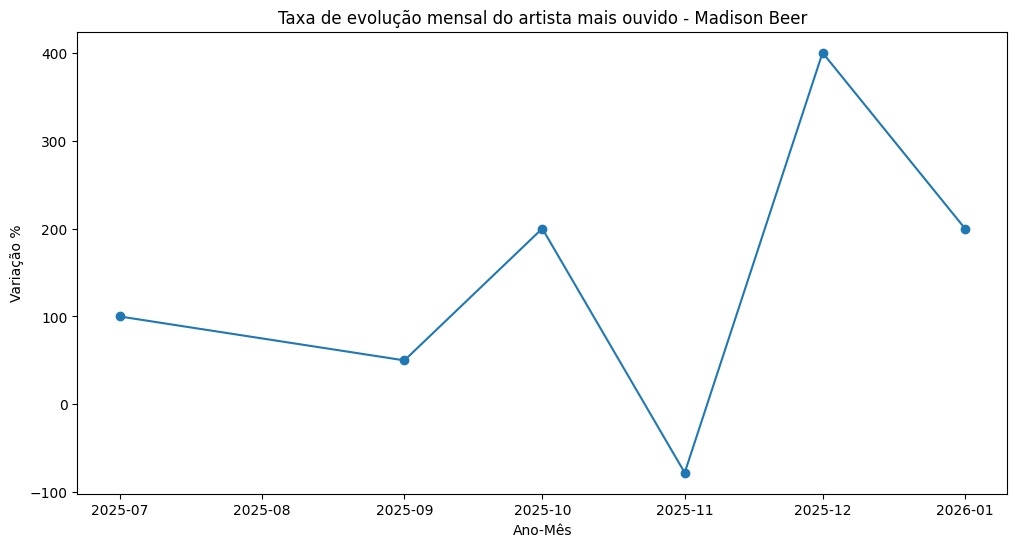

In [134]:
artist_name = top_artist_unique.sort_values("prob_top1", ascending=False).head(1)["master_metadata_album_artist_name"].values[0]

artist_ts = (
    artists_listened_final[
        artists_listened_final["master_metadata_album_artist_name"] == artist_name
    ]
    .sort_values("year_month")
    .set_index("year_month")["count_played"]
)

taxa_evolucao = artist_ts.pct_change() * 100

plt.figure(figsize=(12,6))
plt.plot(taxa_evolucao.index.to_timestamp(), taxa_evolucao.values, marker="o")

plt.xlabel("Ano-Mês")
plt.ylabel("Variação %")
plt.title(f"Taxa de evolução mensal do artista mais ouvido - {artist_name}")

plt.show()